In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#values given in question
Total_epochs = 1000
Alpha_0 = 0.8
Epoch_list = [20,40,100,1000]
Sigmas = [1, 10, 30, 50, 70]
size = 100

## We are using 24 colors some shades of red, green, blue, with some yellow, teal and pink
##### For Red - Red, Tomato, Salmon, Maroon
##### For Green - Lime, Green, Dark Green, Pale Green
##### For Blue - Blue, Royal Blue, Navy, Steel blue
##### For Yellow - Yellow, Olive, Khaki, Yellow Green
##### For Teal - Teal, DarkCyan, Cyan
##### For Pink - Pink, HotPink, DeepPink, Mediumvioletred, Palevioletred

In [3]:
#Training data consist of 24 colors. It is selected from the "RGB Color Table: Basic Colors" section of this page: https://www.rapidtables.com/web/color/RGB_Color.html
def generate_colors():
    colors = np.array(
        [(255,0,0),(255,99,71),(250,128,144),(128,0,0),
          (0,255,0),(0,128,0),(0,100,0),(152,251,152),
          (0,0,255),(65,105,225),(0,0,128),(70,130,180),
          (255,255,0),(128,128,0),(240,230,140),(154,205,50),
          (0,128,128),(0,139,139),(0,255,255),
          (255,192,203),(255,105,180),(255,20,147),(199,21,133),(219,112,147)]
        )
    #calibrate the color codes to values between 0 and 1, instead of being between 0 and 255)
    return colors/255

In [4]:
#Printing the calibrated input
generate_colors()

array([[1.        , 0.        , 0.        ],
       [1.        , 0.38823529, 0.27843137],
       [0.98039216, 0.50196078, 0.56470588],
       [0.50196078, 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.50196078, 0.        ],
       [0.        , 0.39215686, 0.        ],
       [0.59607843, 0.98431373, 0.59607843],
       [0.        , 0.        , 1.        ],
       [0.25490196, 0.41176471, 0.88235294],
       [0.        , 0.        , 0.50196078],
       [0.2745098 , 0.50980392, 0.70588235],
       [1.        , 1.        , 0.        ],
       [0.50196078, 0.50196078, 0.        ],
       [0.94117647, 0.90196078, 0.54901961],
       [0.60392157, 0.80392157, 0.19607843],
       [0.        , 0.50196078, 0.50196078],
       [0.        , 0.54509804, 0.54509804],
       [0.        , 1.        , 1.        ],
       [1.        , 0.75294118, 0.79607843],
       [1.        , 0.41176471, 0.70588235],
       [1.        , 0.07843137, 0.57647059],
       [0.

SOM is a data visualization technique and is unsupervised Learning. It will give idea about changes with reduction of dimensionality.

(10000, 3)
[[0.38039216 0.61568627 0.56862745]
 [0.12156863 0.11372549 0.40392157]
 [0.30588235 0.58823529 0.09019608]
 ...
 [0.17647059 0.16470588 0.53333333]
 [0.09019608 0.58039216 0.74117647]
 [0.38431373 0.50980392 0.18039216]]


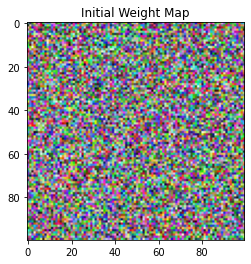

In [5]:
# randomly initialized weights
weights = np.empty([size*size,3]) 

for i in range(0,size*size):
    weights[i][0] = np.random.randint(0,256)/255
    weights[i][1] = np.random.randint(0,256)/255
    weights[i][2] = np.random.randint(0,256)/255

print(weights.shape)
print(weights)
plt.title("Initial Weight Map")
plt.imshow(weights.reshape(size,size,3))
plt.show()

In [6]:
#Defining SOMModel class

class SOMModel:
  def __init__(self, sigma):
    self.sigma = sigma
    # Initialize random weights and calibrate between 0 and 1. 
    # Neuron grid is 100 * 100 => [10000, 2], so weight vector will be [10000, 3] 
    self.wt = np.random.randint(0, 256, np.array([10000, 3]))/255
    self.x_vector, self.y_vector = np.meshgrid(np.linspace(0, size - 1, size), np.linspace(0, size - 1, size))
    #self.coordinates = np.c_[self.xv.ravel(), self.yv.ravel()]
    self.coords= np.c_[self.x_vector.ravel(), self.y_vector.ravel()]
    self.ax = None

  def sigma_setter(self, sigma):
    self.sigma = sigma
  
  def ax_setter(self, axes):
    # Flattening to 1 dimension. 
    self.ax = axes.flatten()

  def set_initial_weight(self):
    self.wt = weights

  """
  N = exp (-d_i,j ^2 / 2 sigma ^ 2 (k))
  """
#Defining Neighbourhood
  def neighbour(self, k, winner):
    e = np.exp(-k/1000)
    sigma_new = self.sigma * e
    winner_neuron_coordinates = (int(winner / 100), winner % 100)
    #Using Euclidean equation to find the distance
    distance = np.linalg.norm(self.coords - winner_neuron_coordinates, axis = 1) ** 2
    return np.exp(- distance/ (2 * (sigma_new**2)))

  def model_plot(self, axis, ep):
    res = False
    if ep in Epoch_list:
      res = True
      self.ax[axis].scatter(self.x_vector.ravel(), self.y_vector.ravel(), c = self.wt, s = 20)
      self.ax[axis].set_title('Plot for Epoch {0}'.format(ep))
    return res

  def train(self, ip):
    a_index = 0
    lr = Alpha_0
    for ep in range(1, Total_epochs + 1):
      
      for x in ip:
        winner_neuron = np.argmin(np.linalg.norm(x - self.wt, axis = 1))
        # Get the neighbourhood 
        neighbour = self.neighbour(ep, winner_neuron)
        # Updating the weights according to wij(k+ 1) =  wij(k) +(k)[x - wij(k)]
        self.wt += lr * neighbour.reshape(-1, 1) * (x - self.wt)

      if self.model_plot(a_index, ep):
        a_index +=1

      # Reduce the learning rate.  l(k) = l0 exp(-k/t)
      lr = Alpha_0 * np.exp(-ep/Total_epochs)



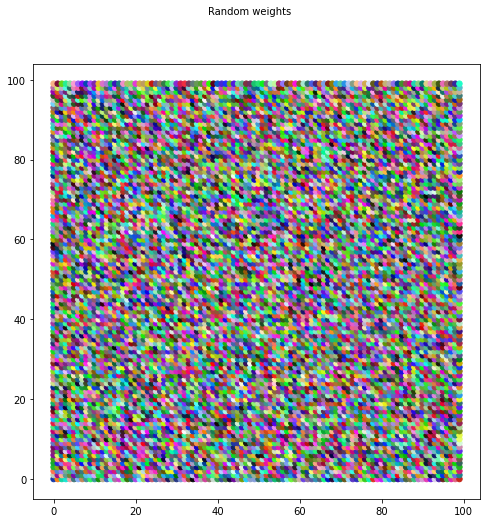

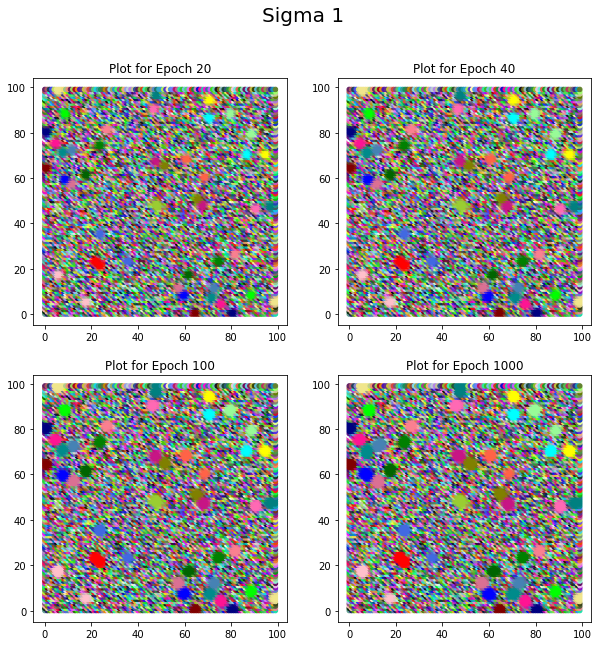

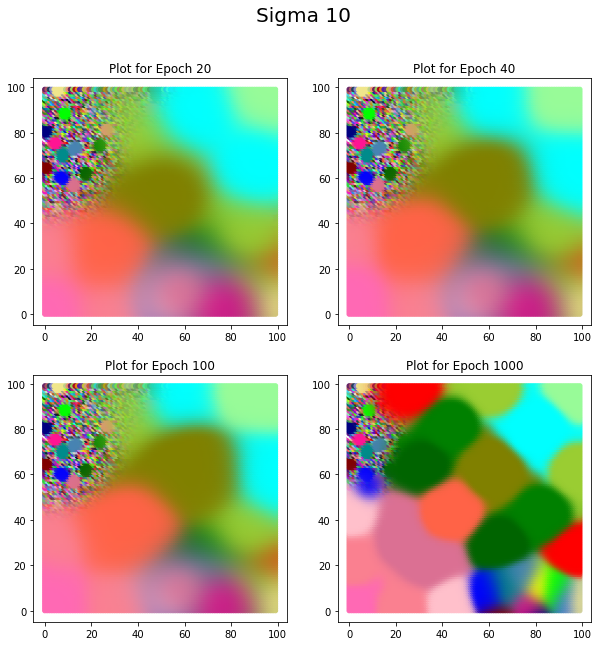

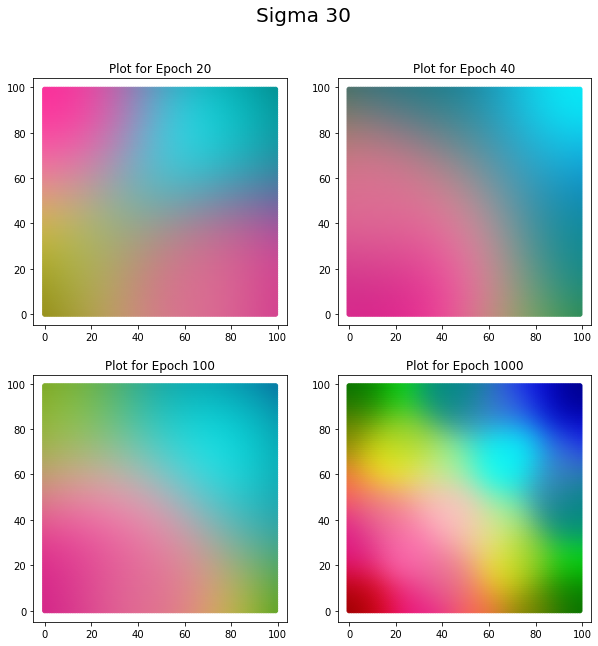

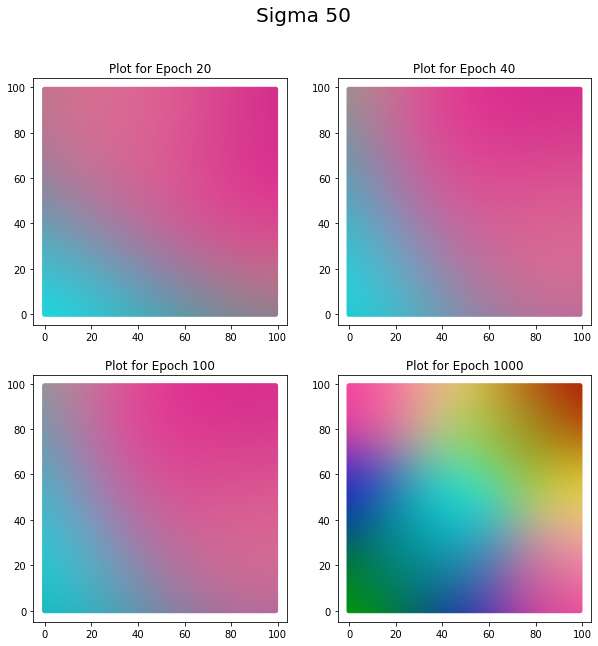

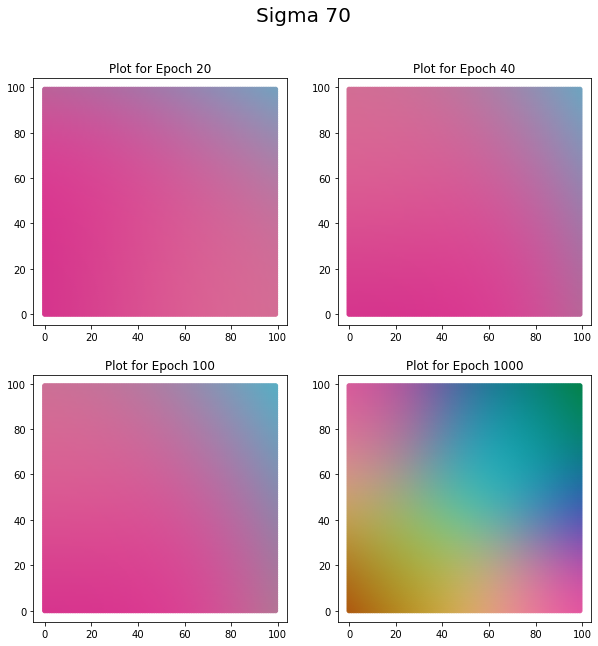

In [7]:
generated_colors = generate_colors()
SomModel = SOMModel(1)
plot_array = list()

fig, img = plt.subplots(figsize = (8, 8))
fig.suptitle('Random weights', fontsize = 10)
img.scatter(SomModel.x_vector.ravel(), SomModel.y_vector.ravel(), s = 30, c = SomModel.wt)
plot_array.append([fig, img])

for i, s in enumerate(Sigmas):
  figure, img1 = plt.subplots(2, 2, figsize = (10, 10))
  figure.suptitle('Sigma {0}'.format(s), fontsize = 20)
  plot_array.append([figure, img1])

  SomModel.sigma_setter(s)
  SomModel.set_initial_weight()
  SomModel.ax_setter(img1)
  SomModel.train(generated_colors)
plt.show()

#### Effect of changing Sigma and Epoch:

For Sigma=1:There is not much Impact by changing the Value of epochs from 20 to 1000. But the colors that are close to each other are grouped together
        
For Sigma=10: So As the Value of sigma increased we can see the graph getting distorted. As sigma increases the distance from neighboorhood increases. But Increasing epoch here is making difference as we can see colours more seperable.

For Sigma 30 : we can see the seperability of colours is becoming unclear and also the boundaries to seperate 2 colours is not visible.
For Sigma= 50: The graphs are getting more unclear with increase in Sigma.
For Sigma = 100 : The graph is very unclear. The boundaries are not at all visible.


here Our neighbourhood function is decaying, so the distance with neighbour will increase with time, increasing sigma values here will make graph unclear but will also group similar colours. And increasing Epoch overall will help us to see colours more clearly.
